## Midterm Assignment: 
### Extreme Heat in Los Angeles:
### Exploration of 2017-2021 American Community Survey Data on Income in LA City 
By: Michelle Gallarza

This project is a continuation of the Extreme Heat in LA group's research into vulnerable communities and populations. For this assignment, I have created bar charts and maps to identify census tracts (and their neighborhoods) with high concentrations of poverty in the city of Los Angeles. This examination will help our team to identify areas where extremely low income (<30% AMI) and very low income (<50% AMI) status intersects with extreme heat and disproportionate burden/exposure.


#### Data Import & Inspection

To create bar charts on neighborhoods with the highest concentrations of low-income households, I start by importing pandas followed by data retreived from Census Explorer. 

In [77]:
import pandas as pd

In [172]:
df = pd.read_csv('data/acs2021_5yr_census-explorer_los-angeles-city_ami_FINAL.csv')

In [173]:
type(df)

pandas.core.frame.DataFrame

Next, I conduct a quick inspection of the data to ensure the column names are accurately displayed.

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   FIPS                              1119 non-null   int64 
 1   name                              1119 non-null   object
 2   Total Households                  1119 non-null   int64 
 3   Households: Less than $10,000     1119 non-null   int64 
 4   Households: $10,000 to $14,999    1119 non-null   int64 
 5   Households: $15,000 to $19,999    1119 non-null   int64 
 6   Households: $20,000 to $24,999    1119 non-null   int64 
 7   Households: $25,000 to $29,999    1119 non-null   int64 
 8   Households: $30,000 to $34,999    1119 non-null   int64 
 9   Households: $35,000 to $39,999    1119 non-null   int64 
 10  Households: $40,000 to $44,999    1119 non-null   int64 
 11  Households: $45,000 to $49,999    1119 non-null   int64 
 12  Households: $50,000 

In [175]:
df.shape

(1119, 21)

In [176]:
df.head()

FIPS                                   name  Total Households  \
0  6037101110  Census Tract 1011.10, Los Angeles, CA              1494   
1  6037101122  Census Tract 1011.22, Los Angeles, CA              1372   
2  6037101220  Census Tract 1012.20, Los Angeles, CA              1357   
3  6037101221  Census Tract 1012.21, Los Angeles, CA              1450   
4  6037101222  Census Tract 1012.22, Los Angeles, CA               935   

   Households: Less than $10,000  Households: $10,000 to $14,999  \
0                             54                             126   
1                             88                               0   
2                             78                              82   
3                             76                             107   
4                            161                             167   

   Households: $15,000 to $19,999  Households: $20,000 to $24,999  \
0                              49                              33   
1                               7                              42   
2                              28                             102   
3                             118                             148   
4                              34                              41   

   Households: $25,000 to $29,999  Households: $30,000 to $34,999  \
0                              61                               6   
1                              50                              36   
2                               7                              86   
3                               0                              81   
4                              19                             116   

   Households: $35,000 to $39,999  ...  Households: $45,000 to $49,999  \
0                              60  ...                              43   
1                               0  ...                               0   
2                              43  ...                              36   
3                             111  ...                              97   
4                               0  ...                              14   

   Households: $50,000 to $59,999  Households: $60,000 to $74,999  \
0                             149                             105   
1                              37                             200   
2                             189                              89   
3                             112                              32   
4                              35                              44   

   Households: $75,000 to $99,999  Households: $100,000 to $124,999  \
0                             146                               210   
1                             158                               126   
2                             134                               116   
3                             193                               207   
4                              96                                 9   

   Households: $125,000 to $149,999  Households: $150,000 to $199,999  \
0                               134                               143   
1                               194                               168   
2                                60                               140   
3                                33                               108   
4                                81                                 0   

   Households: $200K or Above  ≤ $35K (30% AMI)  ≤ $60K (50% AMI)  
0                          90               329               666  
1                         253               223               273  
2                         112               383               706  
3                           0               530               877  
4                          32               538               673  

[5 rows x 21 columns]

#### Leading Zeros Dilemma

Because the FIPS codes are not displaying the leading zero, the column must be converted into a a string/object to move forward.

In [177]:
df = pd.read_csv(
    'data/acs2021_5yr_census-explorer_los-angeles-city_ami_FIPS.csv',
    dtype=
    {'FIPS':str})

I check the data to ensure the operation worked.

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   FIPS                              1121 non-null   object
 1   name                              1121 non-null   object
 2   Total Households                  1121 non-null   int64 
 3   Households: Less than $10,000     1121 non-null   int64 
 4   Households: $10,000 to $14,999    1121 non-null   int64 
 5   Households: $15,000 to $19,999    1121 non-null   int64 
 6   Households: $20,000 to $24,999    1121 non-null   int64 
 7   Households: $25,000 to $29,999    1121 non-null   int64 
 8   Households: $30,000 to $34,999    1121 non-null   int64 
 9   Households: $35,000 to $39,999    1121 non-null   int64 
 10  Households: $40,000 to $44,999    1121 non-null   int64 
 11  Households: $45,000 to $49,999    1121 non-null   int64 
 12  Households: $50,000 

In [179]:
df.head()

FIPS                                   name  Total Households  \
0  06037101110  Census Tract 1011.10, Los Angeles, CA              1494   
1  06037101122  Census Tract 1011.22, Los Angeles, CA              1372   
2  06037101220  Census Tract 1012.20, Los Angeles, CA              1357   
3  06037101221  Census Tract 1012.21, Los Angeles, CA              1450   
4  06037101222  Census Tract 1012.22, Los Angeles, CA               935   

   Households: Less than $10,000  Households: $10,000 to $14,999  \
0                             54                             126   
1                             88                               0   
2                             78                              82   
3                             76                             107   
4                            161                             167   

   Households: $15,000 to $19,999  Households: $20,000 to $24,999  \
0                              49                              33   
1                               7                              42   
2                              28                             102   
3                             118                             148   
4                              34                              41   

   Households: $25,000 to $29,999  Households: $30,000 to $34,999  \
0                              61                               6   
1                              50                              36   
2                               7                              86   
3                               0                              81   
4                              19                             116   

   Households: $35,000 to $39,999  ...  Households: $45,000 to $49,999  \
0                              60  ...                              43   
1                               0  ...                               0   
2                              43  ...                              36   
3                             111  ...                              97   
4                               0  ...                              14   

   Households: $50,000 to $59,999  Households: $60,000 to $74,999  \
0                             149                             105   
1                              37                             200   
2                             189                              89   
3                             112                              32   
4                              35                              44   

   Households: $75,000 to $99,999  Households: $100,000 to $124,999  \
0                             146                               210   
1                             158                               126   
2                             134                               116   
3                             193                               207   
4                              96                                 9   

   Households: $125,000 to $149,999  Households: $150,000 to $199,999  \
0                               134                               143   
1                               194                               168   
2                                60                               140   
3                                33                               108   
4                                81                                 0   

   Households: $200K or Above  ≤ $35K (30% AMI)  ≤ $60K (50% AMI)  
0                          90               329               666  
1                         253               223               273  
2                         112               383               706  
3                           0               530               877  
4                          32               538               673  

[5 rows x 21 columns]

#### Plots

Next, I want to move into creating some bar graphs that display the census tracts with the highest number of extremely low income households, as well as the neighborhoods they are located in.

First, I want to know the average number of households per census tract in the city of Los Angeles.

In [180]:
df['Total Households'].mean()

1239.706512042819

Next, I sort the column that I want to view in the bar chart in descending order. 

I'm going to start with Extremely Low Income (30% of the Area Median Income, which is defined as $35,000 a year for a household of four in Los Angeles (according to the Los Angeles Housing Department).

In [181]:
df_sorted = df.sort_values(by='≤ $35K (30% AMI)',ascending = False)

Then I create a simple bar chart to show the top 10 census tracts with households earning $35,000 or less a year. 

x = census tract and y = count.

<AxesSubplot: xlabel='FIPS'>

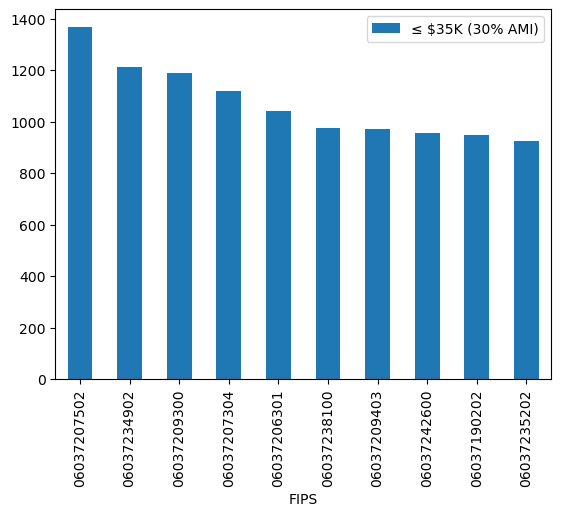

In [182]:
df_sorted.head(10).plot.bar(x='FIPS',
                     y='≤ $35K (30% AMI)')

I will do the same operations for Very Low Income (50% of Area Median Income), which includes census tracts with the most households earning up to $60,000 a year.

In [183]:
df_sorted = df.sort_values(by='≤ $60K (50% AMI)',ascending = False)

<AxesSubplot: xlabel='FIPS'>

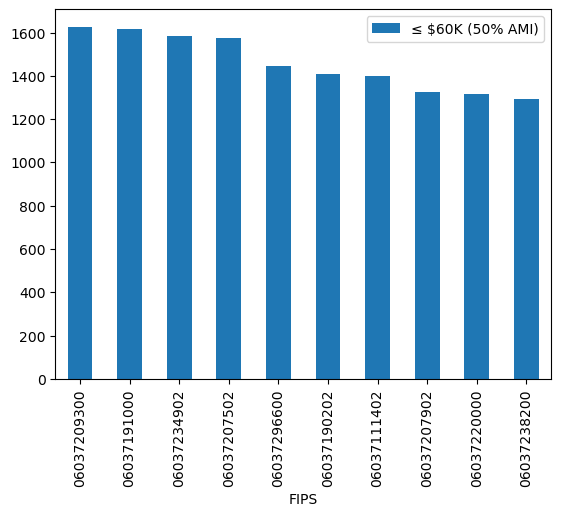

In [184]:
df_sorted.head(10).plot.bar(x='FIPS',
                     y='≤ $60K (50% AMI)')

#### Merging Data

At this stage the bar charts are only able to display census tracts by FIPS codes and not by their neighborhood location. I have to bring in another data set to provide this information. 

The csv file was retrieved from USC's Neighborhood Data for Social Change website.


In [185]:
tracts = pd.read_csv('data/Census_Tract_Locations__LA_City.csv')

I examine the data to ensure FIPS code neighborhood names are displayed.

In [186]:
tracts.head()

geoid                                              Tract  \
0  6037101110  Census Tract 1011.10, Los Angeles County, Cali...   
1  6037101122  Census Tract 1011.22, Los Angeles County, Cali...   
2  6037101210  Census Tract 1012.10, Los Angeles County, Cali...   
3  6037101220  Census Tract 1012.20, Los Angeles County, Cali...   
4  6037101300  Census Tract 1013, Los Angeles County, California   

   Tract Number Neighborhood                   Location   Latitude   Longitude  
0        101110      Tujunga  (34.2595555, -118.293602)  34.259555 -118.293602  
1        101122      Tujunga    (34.267357, -118.29024)  34.267357 -118.290240  
2        101210      Tujunga  (34.251998, -118.2926875)  34.251998 -118.292687  
3        101220      Tujunga  (34.2511895, -118.281014)  34.251190 -118.281014  
4        101300      Tujunga  (34.2455945, -118.271731)  34.245595 -118.271731

The FIPS codes will need to be converted to string/object to address the missing zeros once again.

In [187]:
tracts = pd.read_csv(
    'data/Census_Tract_Locations__LA_City.csv',
    dtype=
    {'geoid':str})

I run a sample to check my work.

In [188]:
tracts.sample()

geoid                                              Tract  \
248  06037131020  Census Tract 1310.20, Los Angeles County, Cali...   

     Tract Number Neighborhood                    Location   Latitude  \
248        131020       Reseda  (34.1992525, -118.5399945)  34.199253   

      Longitude  
248 -118.539995

#### Creating A Column

Because FIPS codes are labeled under "FIPS" in the census data frame and "geoid" in the other, I need to create a new column to be able to merge the two together.

In [189]:
tracts['FIPS'] = tracts['geoid']

I run another sample to check!

In [190]:
tracts.sample(5)

geoid                                              Tract  \
2015  06037604001  Census Tract 6040.01, Los Angeles County, Cali...   
942   06037291300  Census Tract 2913, Los Angeles County, California   
1313  06037432901  Census Tract 4329.01, Los Angeles County, Cali...   
1350  06037461000  Census Tract 4610, Los Angeles County, California   
449   06037192420  Census Tract 1924.20, Los Angeles County, Cali...   

      Tract Number Neighborhood                   Location   Latitude  \
2015        604001     Lawndale  (33.8837445, -118.356835)  33.883744   
942         291300      Gardena  (33.8659415, -118.295352)  33.865941   
1313        432901     Rosemead   (34.076691, -118.071417)  34.076691   
1350        461000     Altadena  (34.187722, -118.1609895)  34.187722   
449         192420    Larchmont    (34.07987, -118.311338)  34.079870   

       Longitude         FIPS  
2015 -118.356835  06037604001  
942  -118.295352  06037291300  
1313 -118.071417  06037432901  
1350 -118.160989  06037461000  
449  -118.311338  06037192420

#### Subsetting the Data

Next, I will trim the data to keep "Neighborhood" and "FIPS." I also keep "Latitude" and "Longitude" just in case I need it later.

In [191]:
tracts = tracts[['Neighborhood','Latitude','Longitude','FIPS']]
tracts.head()

Neighborhood   Latitude   Longitude         FIPS
0      Tujunga  34.259555 -118.293602  06037101110
1      Tujunga  34.267357 -118.290240  06037101122
2      Tujunga  34.251998 -118.292687  06037101210
3      Tujunga  34.251190 -118.281014  06037101220
4      Tujunga  34.245595 -118.271731  06037101300

Now I can merge them together on the "FIPS" column.

In [192]:
tracts_income = tracts.merge(df,on="FIPS")

Checking to make sure the code worked...

In [193]:
tracts_income.head(15)

Neighborhood   Latitude   Longitude         FIPS  \
0             Tujunga  34.259555 -118.293602  06037101110   
1             Tujunga  34.267357 -118.290240  06037101122   
2             Tujunga  34.251190 -118.281014  06037101220   
3             Tujunga  34.245595 -118.271731  06037101300   
4             Tujunga  34.244255 -118.296428  06037101400   
5        Shadow Hills  34.224155 -118.354339  06037102103   
6        Shadow Hills  34.216189 -118.345624  06037102104   
7          Sun Valley  34.210852 -118.348050  06037102105   
8        Shadow Hills  34.241295 -118.329271  06037102107   
9             Sunland  34.274431 -118.307140  06037103101   
10            Sunland  34.262834 -118.306830  06037103102   
11       Shadow Hills  34.255439 -118.352778  06037103300   
12  Lake View Terrace  34.281905 -118.391891  06037104103   
13            Pacoima  34.276146 -118.404645  06037104105   
14            Pacoima  34.271671 -118.397614  06037104108   

                                     name  Total Households  \
0   Census Tract 1011.10, Los Angeles, CA              1494   
1   Census Tract 1011.22, Los Angeles, CA              1372   
2   Census Tract 1012.20, Los Angeles, CA              1357   
3      Census Tract 1013, Los Angeles, CA              1420   
4      Census Tract 1014, Los Angeles, CA              1304   
5   Census Tract 1021.03, Los Angeles, CA               669   
6   Census Tract 1021.04, Los Angeles, CA              1310   
7   Census Tract 1021.05, Los Angeles, CA               554   
8   Census Tract 1021.07, Los Angeles, CA              1204   
9   Census Tract 1031.01, Los Angeles, CA               915   
10  Census Tract 1031.02, Los Angeles, CA              1651   
11     Census Tract 1033, Los Angeles, CA              1203   
12  Census Tract 1041.03, Los Angeles, CA               866   
13  Census Tract 1041.05, Los Angeles, CA              1526   
14  Census Tract 1041.08, Los Angeles, CA              1288   

    Households: Less than $10,000  Households: $10,000 to $14,999  \
0                              54                             126   
1                              88                               0   
2                              78                              82   
3                              68                              27   
4                               7                              98   
5                              24                               0   
6                              54                              74   
7                               5                              21   
8                              18                              43   
9                               7                              14   
10                             59                              91   
11                              7                              63   
12                             12                               6   
13                            178                              49   
14                             78                             121   

    Households: $15,000 to $19,999  Households: $20,000 to $24,999  ...  \
0                               49                              33  ...   
1                                7                              42  ...   
2                               28                             102  ...   
3                               37                              15  ...   
4                               57                             176  ...   
5                               33                              40  ...   
6                               11                              18  ...   
7                               13                               6  ...   
8                               45                              51  ...   
9                                6                              69  ...   
10                              12                              45  ...   
11                

... and it did! This process took quite awhile to figure out, including finding the right data set and cleaning the data appropriately. But now I am able to get the charts I want.

#### Bar Charts with Neighborhood Labels

I can now re-plot the bar charts with the census tracts assigned to their corresponding LA neighborhood. First, I will sort and plot Extremely Low Income households.

In [194]:
tracts_income_sorted = tracts_income.sort_values(by='≤ $35K (30% AMI)',ascending = False)

In [195]:
tracts_income_sorted.head(15).plot.bar(x='Neighborhood',
                     y='≤ $35K (30% AMI)')

<AxesSubplot: xlabel='Neighborhood'>

It worked! 

Now I can see that Downtown Los Angeles contains the census tract with the highest number of extremely low income households in the city. Other neighborhoods with mulitiple <30% AMI census tracts  include Hyde Park, Westlake, Hollywood, and San Pedro.

#### Customizing Charts

I want to add a title and change the chart color, so I add some more arguments

In [196]:
tracts_income_sorted.head(15).plot.barh(x='Neighborhood',
                     y='≤ $35K (30% AMI)',
                     title='Census Tracts with Most Households Below 30% AMI in Los Angeles City in 2020',
                     color='orange')

<AxesSubplot: title={'center': 'Census Tracts with Most Households Below 30% AMI in Los Angeles City in 2020'}, ylabel='Neighborhood'>

I will repeat these steps for Very Low Income households as a means of comparision.

In [197]:
tracts_income_sorted = tracts_income.sort_values(by='≤ $60K (50% AMI)',ascending = False)

In [198]:
tracts_income_sorted.head(15).plot.bar(x='Neighborhood',
                     y='≤ $60K (50% AMI)')

<AxesSubplot: xlabel='Neighborhood'>

The <50% AMI households chart includes many of the same neighborhoods as the prior chart. These neighborhoods may be of interest to our group as we consider what areas of the city face the greatest barriers to accessing relief during heat waves. 

As with the prior bar chart, I will add a title and change the color of this chart.

<AxesSubplot: title={'center': 'Census Tracts with Most Households Below 50% AMI in Los Angeles City in 2020'}, xlabel='Neighborhood'>

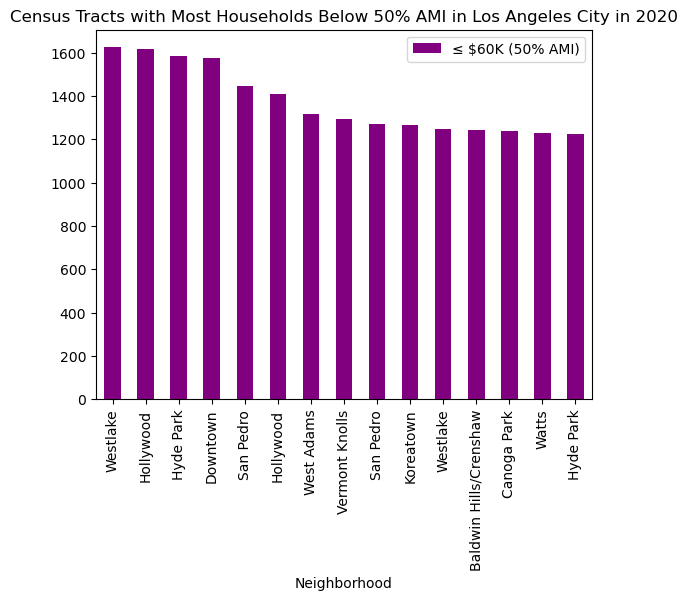

In [199]:
tracts_income_sorted.head(15).plot.bar(x='Neighborhood',
                     y='≤ $60K (50% AMI)',
                     title='Census Tracts with Most Households Below 50% AMI in Los Angeles City in 2020',
                     color='purple')

As noted earlier, the average number of households per census tract in Los Angeles city is 1,240. The Westlake neighborhood contains one census tract that is home to over 1,600 very low-income households alone, suggesting a high concentration of poverty. 

A follow-up analysis may be needed to understand and overlay extreme heat risks and resource access in areas of concentrated poverty (e.g., home air conditioning, bus shelters, tree canopy, cooling centers, hospitals, etc.).

#### Mapping

I will try to map the data I have just plotted using a Los Angeles County geojson file. 

First, I import geopandas and the geojson file.

In [200]:
import geopandas as gpd

In [201]:
lac = gpd.read_file('data/Census_Tracts_2020.geojson')

Checking the data:

In [202]:
lac.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [203]:
lac.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0         1  101110  1011.10  1.229562e+07   15083.854287   
1         2  101122  1011.22  2.845774e+07   31671.455844   
2         3  101220  1012.20  7.522093e+06   12698.783810   
3         4  101221  1012.21  3.812000e+06    9161.710543   
4         5  101222  1012.22  3.191371e+06    9980.600461   

                                            geometry  
0  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  
1  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  
2  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  
4  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

I perform a simple test plot to see the figure and ensure it is accurate.

<AxesSubplot: >

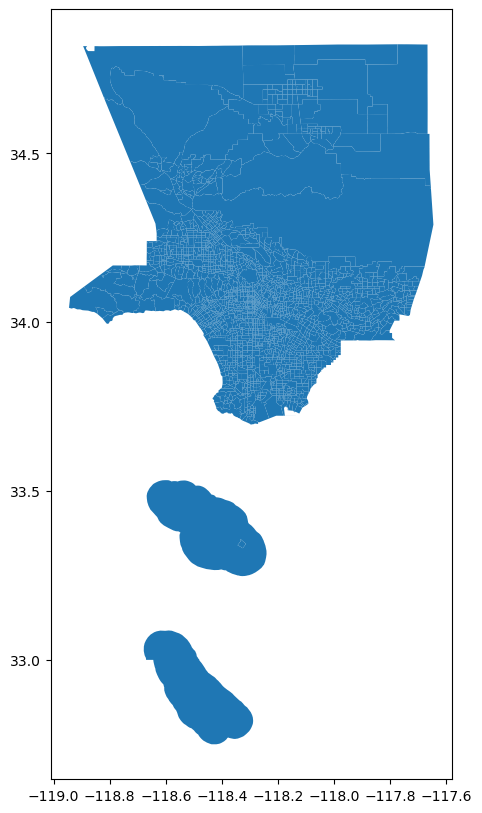

In [204]:
lac.plot(figsize=(12,10))

I decide to subset the data to make it more managable later. For this mapping exercise, I will only keep census tract and geometry data.

In [205]:
lac = lac[['CT20','geometry']]

Because the census data is not in FIPS format, I need to add the California state (06) and Los Angeles County (037) codes and create a new column for FIPS.

In [206]:
# create a FIPS column
lac['FIPS'] ='06' + '037' + lac['CT20']

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Check it.

In [207]:
lac.head()

CT20                                           geometry         FIPS
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222

Now I will subset the census income data to only include columns that contain income ranges.

In [208]:
df.columns.to_list()

['FIPS',
 'name',
 'Total Households',
 'Households: Less than $10,000',
 'Households: $10,000 to $14,999',
 'Households: $15,000 to $19,999',
 'Households: $20,000 to $24,999',
 'Households: $25,000 to $29,999',
 'Households: $30,000 to $34,999',
 'Households: $35,000 to $39,999',
 'Households: $40,000 to $44,999',
 'Households: $45,000 to $49,999',
 'Households: $50,000 to $59,999',
 'Households: $60,000 to $74,999',
 'Households: $75,000 to $99,999',
 'Households: $100,000 to $124,999',
 'Households: $125,000 to $149,999',
 'Households: $150,000 to $199,999',
 'Households: $200K or Above',
 '≤ $35K (30% AMI)',
 '≤ $60K (50% AMI)']

In [209]:
columns_to_keep = ['FIPS',
 'Households: Less than $10,000',
 'Households: $10,000 to $14,999',
 'Households: $15,000 to $19,999',
 'Households: $20,000 to $24,999',
 'Households: $25,000 to $29,999',
 'Households: $30,000 to $34,999',
 'Households: $35,000 to $39,999',
 'Households: $40,000 to $44,999',
 'Households: $45,000 to $49,999',
 'Households: $50,000 to $59,999',
 'Households: $60,000 to $74,999',
 'Households: $75,000 to $99,999',
 'Households: $100,000 to $124,999',
 'Households: $125,000 to $149,999',
 'Households: $150,000 to $199,999',
 'Households: $200K or Above',
 '≤ $35K (30% AMI)',
 '≤ $60K (50% AMI)']

In [210]:
df2 = df[columns_to_keep]

Now that I have my data subset, I can merge the two data sets!

In [211]:
lac_income=lac.merge(df2,on="FIPS")

In [212]:
lac_income.head()

CT20                                           geometry         FIPS  \
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110   
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122   
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220   
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221   
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222   

   Households: Less than $10,000  Households: $10,000 to $14,999  \
0                             54                             126   
1                             88                               0   
2                             78                              82   
3                             76                             107   
4                            161                             167   

   Households: $15,000 to $19,999  Households: $20,000 to $24,999  \
0                              49                              33   
1                               7                              42   
2                              28                             102   
3                             118                             148   
4                              34                              41   

   Households: $25,000 to $29,999  Households: $30,000 to $34,999  \
0                              61                               6   
1                              50                              36   
2                               7                              86   
3                               0                              81   
4                              19                             116   

   Households: $35,000 to $39,999  ...  Households: $45,000 to $49,999  \
0                              60  ...                              43   
1                               0  ...                               0   
2                              43  ...                              36   
3                             111  ...                              97   
4                               0  ...                              14   

   Households: $50,000 to $59,999  Households: $60,000 to $74,999  \
0                             149                             105   
1                              37                             200   
2                             189                              89   
3                             112                              32   
4                              35                              44   

   Households: $75,000 to $99,999  Households: $100,000 to $124,999  \
0                             146                               210   
1                             158                               126   
2                             134                               116   
3                             193                               207   
4                              96                                 9   

   Households: $125,000 to $149,999  Households: $150,000 to $199,999  \
0                               134                               143   
1                               194                               168   
2                                60                               140   
3                                33                               108   
4                                81                                 0   

   Households: $200K or Above  ≤ $35K (30% AMI)  ≤ $60K (50% AMI)  
0                          90               329               666  
1                         253               223               273  
2                         112               383               706  
3                           0               530               877  
4                          32               538               673  

[5 rows x 21 columns]

I try making my first map below.

<AxesSubplot: >

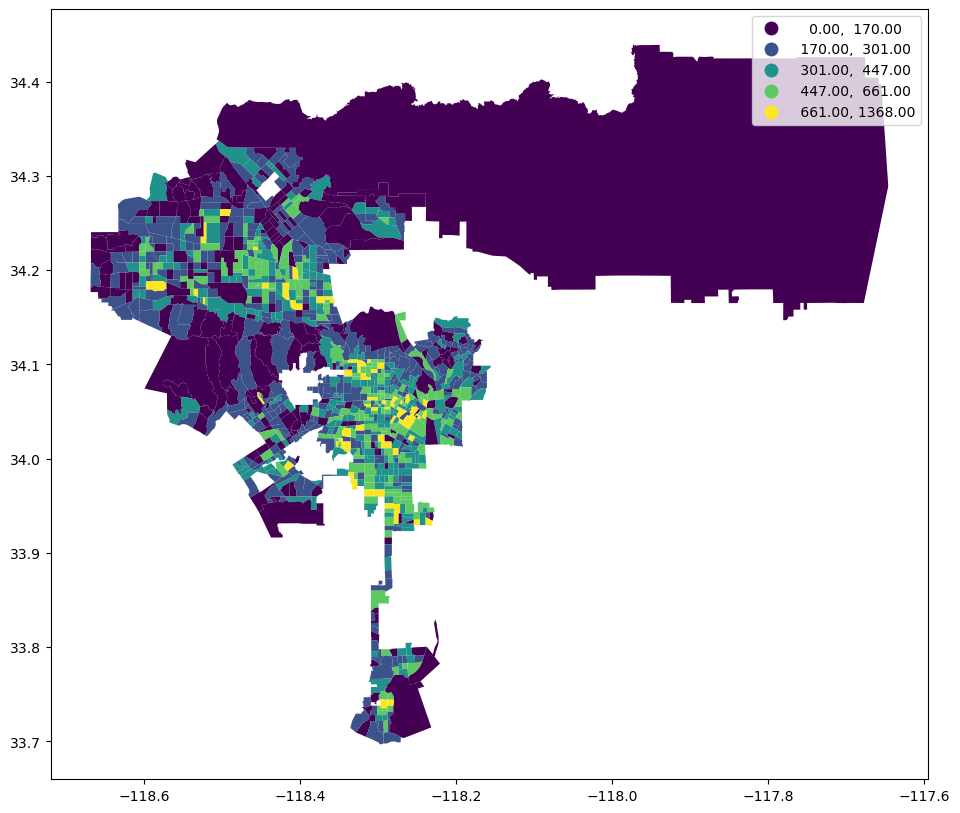

In [213]:
lac_income.plot(figsize=(12,10),
                 column='≤ $35K (30% AMI)',
                 legend=True, 
                 scheme='NaturalBreaks')

The map shape is not accurate to the city of Los Angeles because at least one large census tract in the northeast is both inside and outside the city. Nevertheless, the map is still telling on where extreme poverty is concentrated.

<AxesSubplot: >

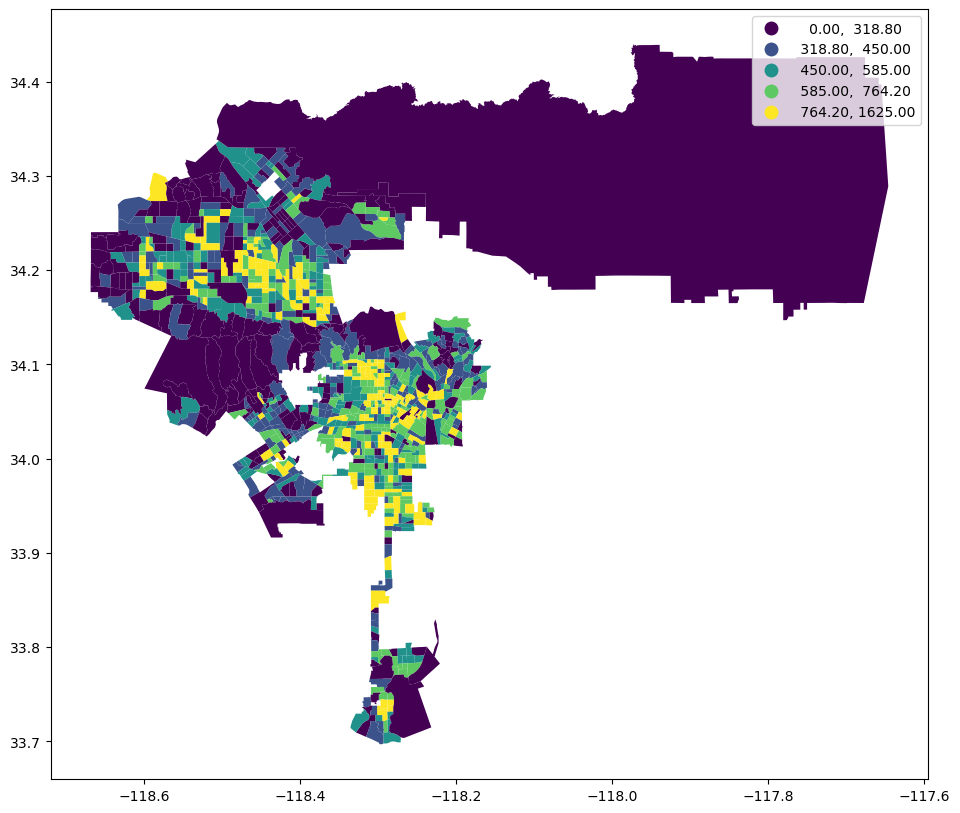

In [214]:
lac_income.plot(figsize=(12,10),
                 column='≤ $60K (50% AMI)',
                 legend=True, 
                 scheme='quantiles')

This map displays very low income dispersion across the city.

Lastly, I will attempt to create a folium map of extremely low income census tracts.

In [215]:
import folium

In [236]:
m = folium.Map(location=[34.1,-118.4], 
               zoom_start = 10,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=lac_income, 
                  data=lac_income,          
                  key_on='feature.properties.FIPS',
                  columns=['FIPS', '≤ $35K (30% AMI)'],
                  fill_color='BuPu',
                  line_weight=0.5, 
                  fill_opacity=1,
                  line_opacity=1, 
                  legend_name='Population Extremely Low Income (2020)').add_to(m)    # name on the legend color bar
m

This map provides a nice display of where the purple/extremely low income census tracts are located. In the future, I will attempt to learn more customization features to make the map more visually appealing.